# League of Legends Win Predictor
## 29/12/2022
The aim of this project is to predict the outcome of a League of Legends game with gameplay data from the first 10 minutes of the game. The average length of a game is around 28 minutes, and being able to predict outcomes to a high accuracy could present opportunities in a live betting scenario, for example.

The dataset used is from https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min and covers roughly 10,000 games.

In [2]:
#import relevant modules
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [3]:
# Read in and display dataset
df = pd.read_csv('high_diamond_ranked_10min.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

# Clean Data

In [4]:
# Set maximum number of columns displayed to 40.
pd.set_option('display.max_columns', 40)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# Drop gameId as it is irrelevant to model
df.drop('gameId',axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Next we will only choose the variables that are player influenced, along with the target variable, and write this into a new dataframe. There is no need for outlier removal as all data comes from the Riot API and is assumed to be fully accurate.

In [6]:
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


# Visualisation

Plot all the variables in a collinearity matrix to determine if any two variables have too high a correlation and would adversely affect the modelling process.

In [7]:
def corr_heatmap(df, digits=3, cmap='coolwarm'):
    """
    Creates a correlation heatmap to easily visualize multicollinearity
    that might be present in the dataframe.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        digits (int) : Number of decimal places to display
        cmap (str) : Colormap to display correlation range.

    Returns:
        fig : Matplotlib Figure
        ax : Matplotlib Axis
    """
    # Create correlation matrix from dataframe
    correl = df.corr().round(digits)
    correl

    # Create mask for upper triangle of matrix
    mask = np.zeros_like(correl)
    mask[np.triu_indices_from(mask)] = True

    #Create heatmap correlation matrix
    fig, ax = plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
    sns.heatmap(correl, annot=True, ax=ax, cmap=cmap, vmin=-1, vmax=1,\
                mask=mask);
    return fig, ax

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

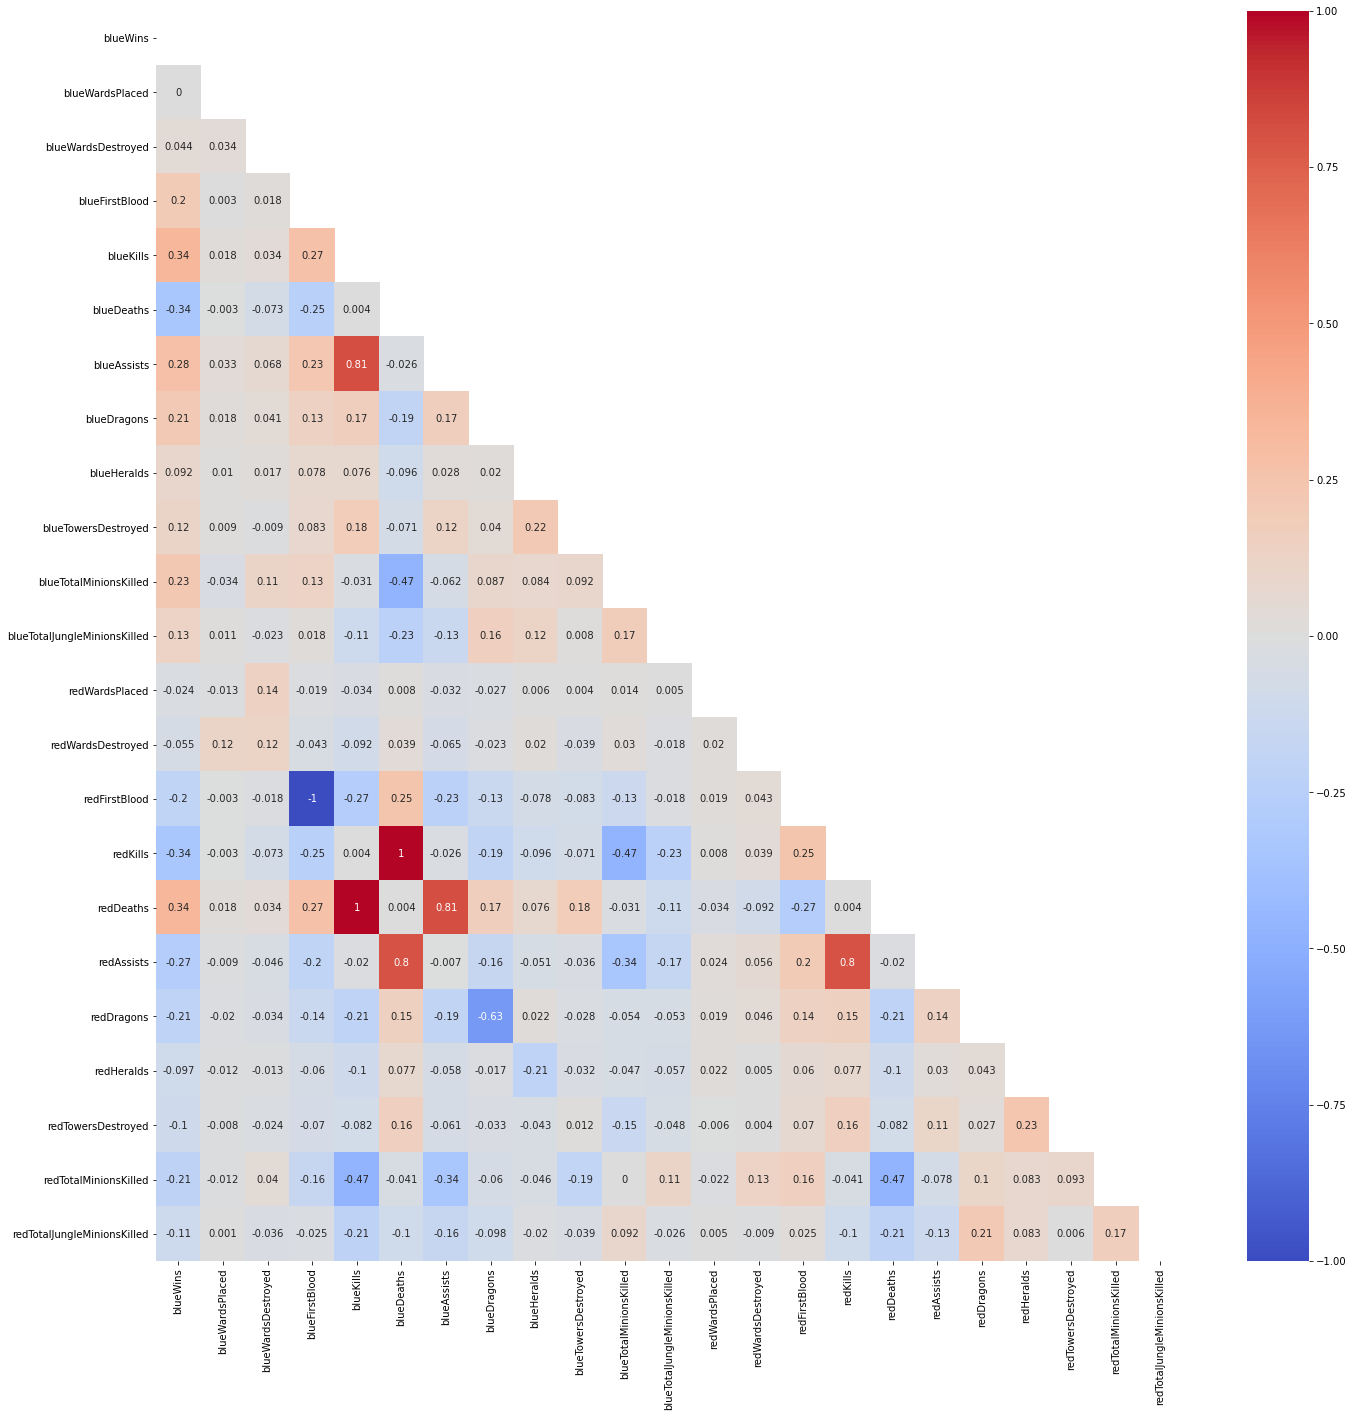

In [8]:
# Plot heatmap of selected df
corr_heatmap(df_select)

Notice the perfect collinearity bertween redkills and bluedeaths and vice versa, and redfirstblood and bluefirstblood. We can therefore remove one set of these variables.

In [9]:
#df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'],axis=1, inplace=True)
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

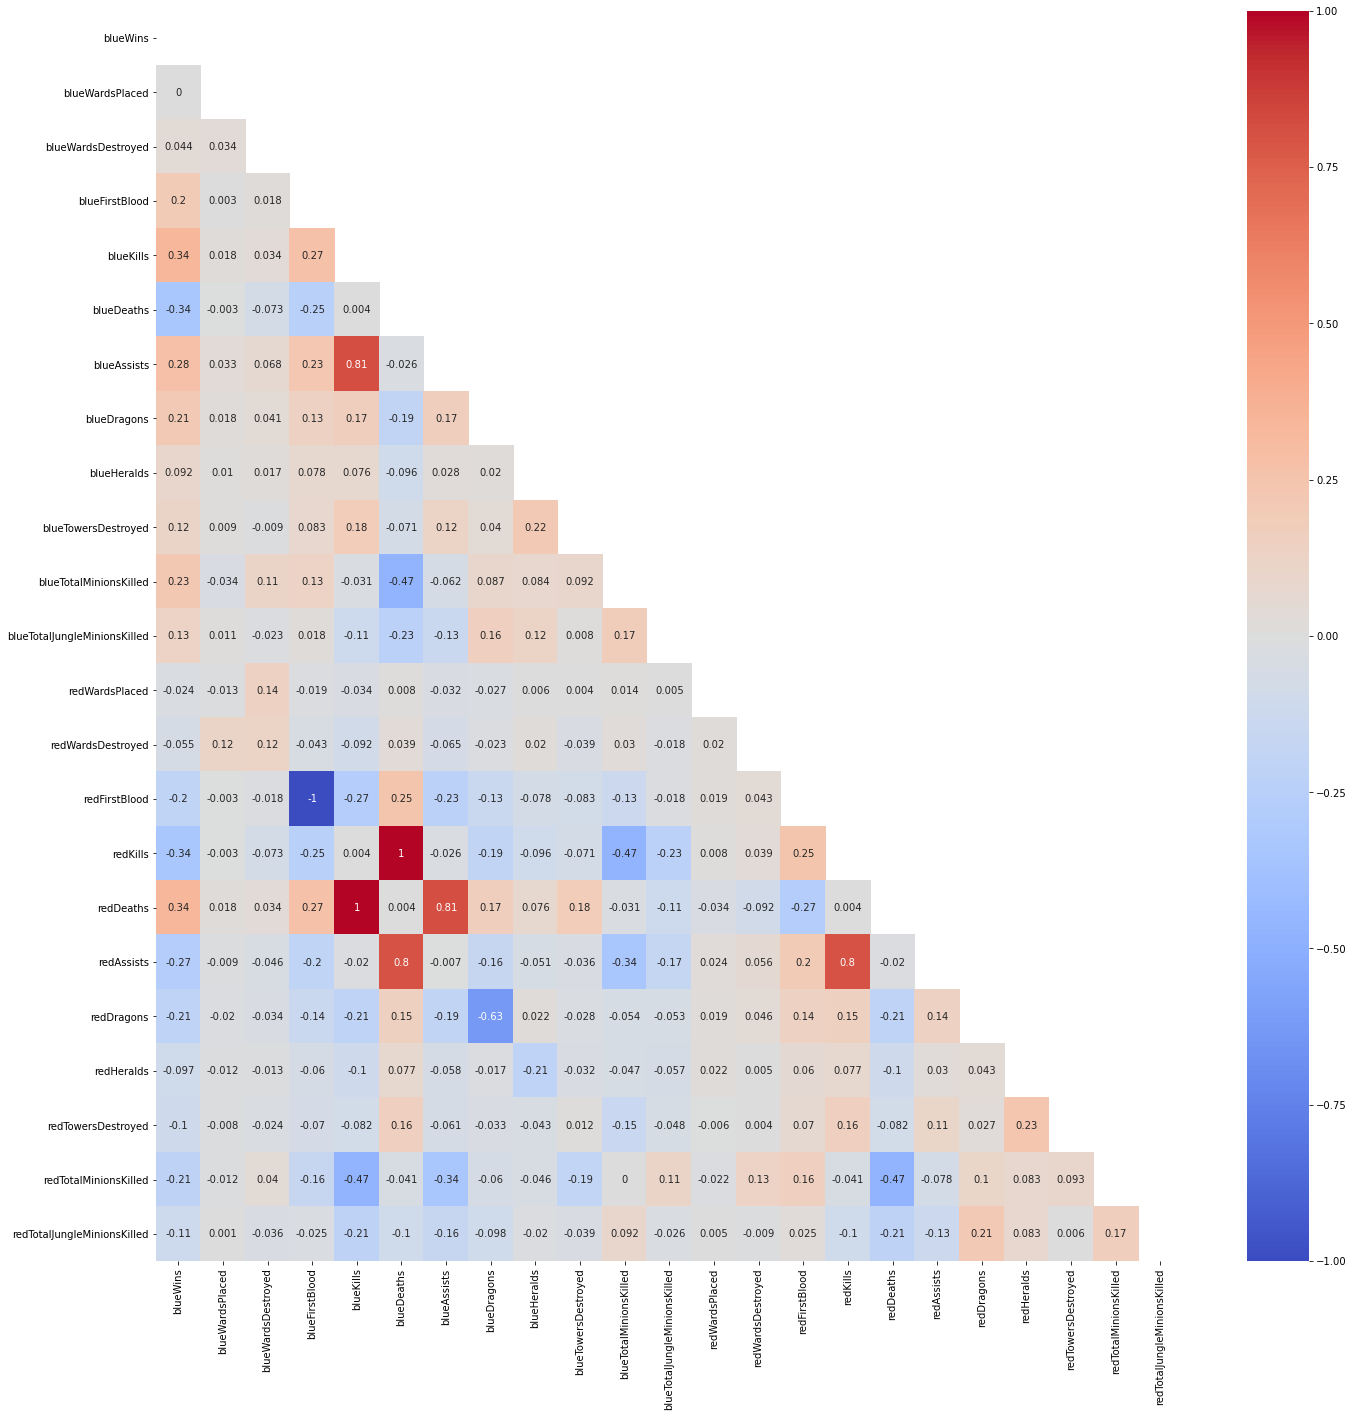

In [10]:
#Check no problem with multicollinearity
corr_heatmap(df_select)

We now want to check there is no problem with class imbalance in the dataset by checking the number of wins and losses

In [11]:
print('Blue team wins = ', len(df_select[df_select['blueWins']==1]))
print('Red team wins = ', len(df_select[df_select['blueWins']==0]))

Blue team wins =  4930
Red team wins =  4949


As we can see there is no problem with class imbalance

# Modelling
We will look at two different linear classification algorithsm: Ridge regression vs logistic regression and see which is more accurate and efficient. Both models can then be used to determine the biggest factors affecting the outcome of the game by investigating the weightings of the different variables.

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix 
 only once.

In [12]:
#Relevant ML imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [13]:
#First define function to split dataframe into scaled training and testing data sets
def split_scale(df, target, scaler=StandardScaler()):
    # Separate x and y
    target = target
    y = df[target]
    x = df.drop(target, axis=1)

    # Train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    # Get list of column names
    cols = x_train.columns

    # Scale columns
    scaler = scaler
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=cols)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=cols)
    
    return x_train, x_test, y_train, y_test

In [14]:
#Call function on select data frame
x_train_select, x_test_select, y_train_select, y_test_select = split_scale(df_select, 'blueWins')
x_train_select.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,-0.512181,-0.841341,0.991533,-1.052932,0.633371,-1.139509,-0.757212,-0.478215,-0.207615,1.065014,0.549820,0.841106,1.035125,-0.991533,0.633371,-1.052932,1.068596,1.201500,-0.437873,-0.203246,1.757624,2.469750
1,-0.346926,0.082414,0.991533,-0.061677,-0.382793,-0.159148,-0.757212,-0.478215,-0.207615,0.290559,0.549820,-0.343382,-0.342913,-0.991533,-0.382793,-0.061677,-0.157475,1.201500,-0.437873,-0.203246,1.258135,-0.731366
2,-0.457096,1.929923,-1.008540,-0.061677,-0.044072,0.576123,1.320634,-0.478215,3.927374,-0.210558,0.952699,0.087341,0.116433,1.008540,-0.044072,-0.061677,-0.647903,-0.832293,2.283770,8.680808,1.121910,0.869192
3,0.314094,-0.841341,0.991533,1.920831,0.294649,1.556484,-0.757212,-0.478215,-0.207615,-0.119446,0.449100,-0.612584,0.116433,-0.991533,0.294649,1.920831,0.087740,1.201500,-0.437873,-0.203246,-1.920436,-0.131157
4,-0.346926,0.544291,-1.008540,-1.052932,-0.044072,-1.139509,-0.757212,2.091108,-0.207615,0.017223,0.751259,1.002627,-0.802259,1.008540,-0.044072,-1.052932,-0.402689,1.201500,-0.437873,-0.203246,-0.785232,1.869540


In [15]:
# Fit both Ridge Classifier and Logistic Regression models
LogReg = LogisticRegressionCV()
RidgeClass = RidgeClassifier()
LogReg.fit(x_train_select, y_train_select)
RidgeClass.fit(x_train_select, y_train_select)

RidgeClassifier()

In [25]:
#Evaluate both models and compare their average precision scores
y_log_test = LogReg.predict(x_test_select)
y_log_train = LogReg.predict(x_train_select)

y_ridge_test = RidgeClass.predict(x_test_select)
y_ridge_train = RidgeClass.predict(x_train_select)

print('LOGISTIC REGRESSION ACCURACY SCORES:')
print('Training Data:')
print(metrics.classification_report(y_train_select, y_log_train, digits=4))
print('Testing Data:')
print(metrics.classification_report(y_test_select, y_log_test, digits=4))

print('RIDGE CLASSIFICATION ACCURACY SCORES:')
print('Training Data:')
print(metrics.classification_report(y_train_select, y_ridge_train, digits=4))
print('Testing Data:')
print(metrics.classification_report(y_test_select, y_ridge_test, digits=4))

LOGISTIC REGRESSION ACCURACY SCORES:
Training Data:
              precision    recall  f1-score   support

           0     0.7208    0.7258    0.7233      3713
           1     0.7226    0.7175    0.7201      3696

    accuracy                         0.7217      7409
   macro avg     0.7217    0.7217    0.7217      7409
weighted avg     0.7217    0.7217    0.7217      7409

Testing Data:
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

RIDGE CLASSIFICATION ACCURACY SCORES:
Training Data:
              precision    recall  f1-score   support

           0     0.7188    0.7256    0.7222      3713
           1     0.7217    0.7148    0.7182      3696

    accuracy                         0.7202      7409
   macro 

As we can see from the macro recall scores for both methods, the logistic regression algorithm has a slightly better performance on the testing data set. We will now look at the coefficient from each classifier to see which variables have the greatest impact on the outcome of the game.

In [55]:
#Create function to display our weightings in a visual format
def coefbarplot(model, n):
    coefs = pd.Series(model.coef_.flatten(), index=x_train_select.columns).sort_values(ascending=False)
    # Convert log odds to odds
    odds = np.exp(coefs) - 1
    
    # Create bar plot of odds
    sns.set_style('darkgrid')
    #fig, ax = plt.subplots(figsize = (10,10))
    sns.barplot(ax=axs[n], x=odds.values, y=odds.index, palette = 'flare')
    
    axs[n].set_xlabel('Change in Odds of Blue Winning')
    axs[n].set_ylabel('Variable')
    #ax.set_xlim([-.6, 1.1]);

Text(0.5, 1.0, 'Coefficient Odds vs In Game Variables for Ridge Regression')

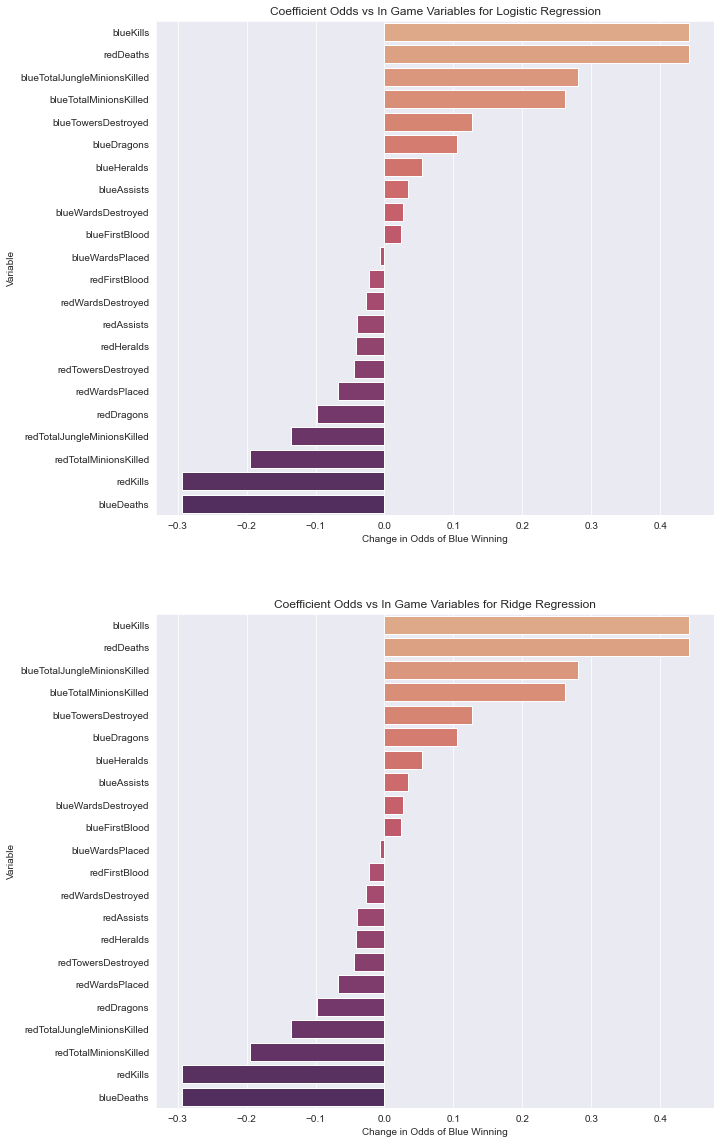

In [58]:
fig, axs = plt.subplots(2, 1, figsize=(10,20))
coefbarplot(LogReg, 0)
axs[0].set_title('Coefficient Odds vs In Game Variables for Logistic Regression') 
coefbarplot(LogReg, 1)
axs[1].set_title('Coefficient Odds vs In Game Variables for Ridge Regression')

Both models generally agree, with some slight discrepancies with valuing First bloods over wards destroyed, showing us the biggest factors being Kills, followed by Jungle Monsters and the minions.

Towers have lower value yet are still the most important objective followed by dragons and then heralds(an objective that is used primarily for the taking of towers).